In [52]:
import sys

import importlib
sys.path.append('../src')
sys.path.append("../legacy")

from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from zadu import zadu
from zaduvis import zaduvis

importlib.reload(zadu)
importlib.reload(zaduvis)




<module 'zaduvis.zaduvis' from '../src/zaduvis/zaduvis.py'>

### Dataset Generation

In [33]:
digits, digits_label = load_digits(return_X_y=True)
iris, iris_label = load_iris(return_X_y=True)

pca = PCA(n_components=2)

digits_pca = pca.fit_transform(digits)
iris_pca = pca.fit_transform(iris)


### Running ZADU

In [34]:
spec_list = [
  {
    "measure": "tnc",
    "params": {
			"k": 25
		}
	},
  {
    "measure": "ca_tnc",
		"params": {
			"k": 30
		}       
	},
  {
    "measure": "dtm"
	},
  {
    "measure": "neighborhood_dissimilarity",
    "params": {
			"k": 50
		}
	}
]

zadu_obj = zadu.ZADU(spec_list, return_local=True)
scores, local_list = zadu_obj.run(digits, digits_pca, digits_label)

trust_conti_local = local_list[0]
trust_conti_local

{'local_trustworthiness': array([0.97146106, 0.93023309, 0.57544059, ..., 0.5547925 , 0.76322911,
        0.56495736]),
 'local_continuity': array([0.98778852, 0.97791927, 0.90105742, ..., 0.90089824, 0.90476407,
        0.84964184])}

[96.93040213354219, 0.6367708925525881, -0.4245139283683921]
[93.12762635170994, 1.8597612279704407, -1.2398408186469605]
[88.16802140566693, 2.924002274019331, -1.9493348493462206]
[93.58519854996233, 1.0243320068220605, -0.6828880045480403]
[85.85867382141383, 3.5430358158044335, -2.3620238772029554]
[94.84406128339597, 0.781330301307563, -0.5208868675383753]
[74.52333457288321, 6.244434337691868, -4.162956225127912]
[80.11330168337312, 5.149152927799887, -3.4327686185332578]
[58.93906307780128, 16.216372939169982, -10.810915292779988]
[63.5835266983377, 6.678999431495166, -4.452666287663444]
[75.11159693986258, 7.013348493462191, -4.675565662308127]
[67.51120198610663, 11.843229107447414, -7.895486071631609]
[79.59004927140684, 2.440659465605456, -1.6271063104036374]
[87.18983989376495, 2.9009437180216047, -1.9339624786810699]
[94.81700162289529, 1.1963843092666284, -0.7975895395110857]
[60.34476409263097, 15.218646958499146, -10.145764638999431]
[85.47962020826823, 3.55013075611142

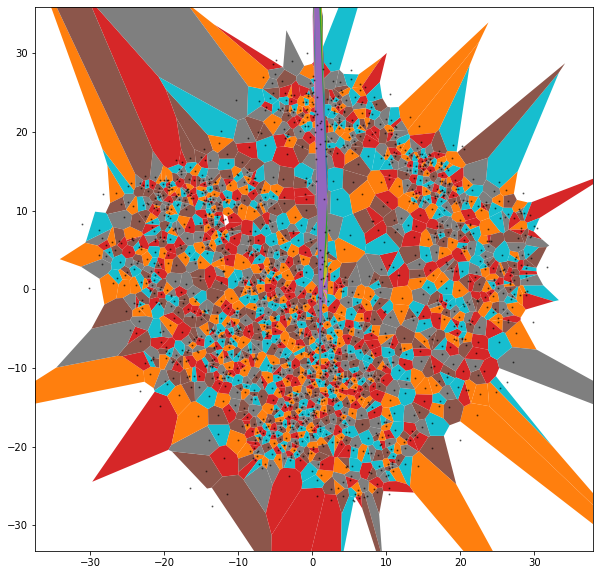

In [53]:
zaduvis.checkviz(digits_pca, trust_conti_local["local_trustworthiness"], trust_conti_local["local_continuity"])